In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../Data/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [8]:
df['readmitted'].value_counts(normalize=True)*100

readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64

In [9]:
df['age'].value_counts().sort_index()

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: count, dtype: int64

In [10]:
df['readmitted_30'] = (df['readmitted'] == '<30').astype(int) 

In [11]:
df.groupby('age')['readmitted_30'].mean().sort_index() * 100

age
[0-10)       1.863354
[10-20)      5.788712
[20-30)     14.242607
[30-40)     11.231788
[40-50)     10.604027
[50-60)      9.666203
[60-70)     11.128408
[70-80)     11.773055
[80-90)     12.083503
[90-100)    11.099177
Name: readmitted_30, dtype: float64

In [12]:
age_readmit_rate = (
    df.groupby('age')['readmitted_30'].mean().sort_index() * 100
)

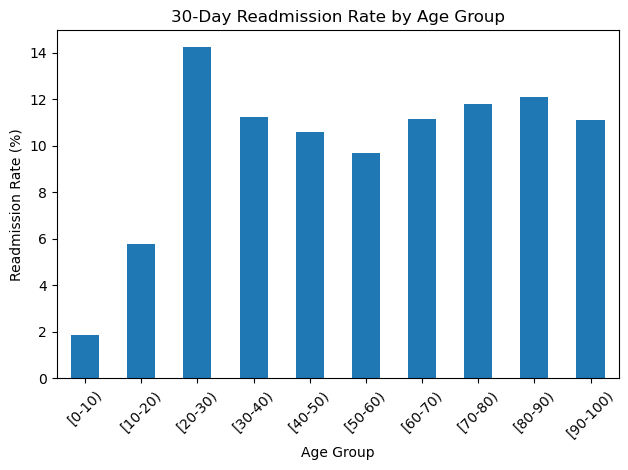

In [13]:
import matplotlib.pyplot as plt
plt.figure()
age_readmit_rate.plot(kind='bar')
plt.title('30-Day Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
(df.groupby('time_in_hospital')['readmitted_30']
   .mean()
   .sort_index() * 100)

time_in_hospital
1      8.178491
2      9.939619
3     10.666817
4     11.806952
5     12.030905
6     12.587876
7     12.834955
8     14.233660
9     13.724184
10    14.346712
11    10.512129
12    13.328729
13    12.314050
14    12.955854
Name: readmitted_30, dtype: float64

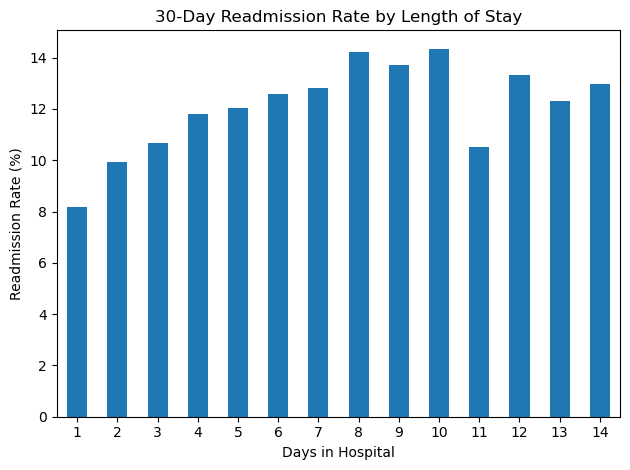

In [15]:
time_readmit_rate = (
    df.groupby('time_in_hospital')['readmitted_30']
      .mean()
      .sort_index() * 100
)

import matplotlib.pyplot as plt

plt.figure()
time_readmit_rate.plot(kind='bar')
plt.title('30-Day Readmission Rate by Length of Stay')
plt.xlabel('Days in Hospital')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
(df.groupby('num_medications')['readmitted_30']
   .mean()
   .sort_index() * 100)

num_medications
1       4.198473
2       8.297872
3       7.222222
4       8.045166
5       7.436787
         ...    
72    100.000000
74      0.000000
75      0.000000
79      0.000000
81    100.000000
Name: readmitted_30, Length: 75, dtype: float64

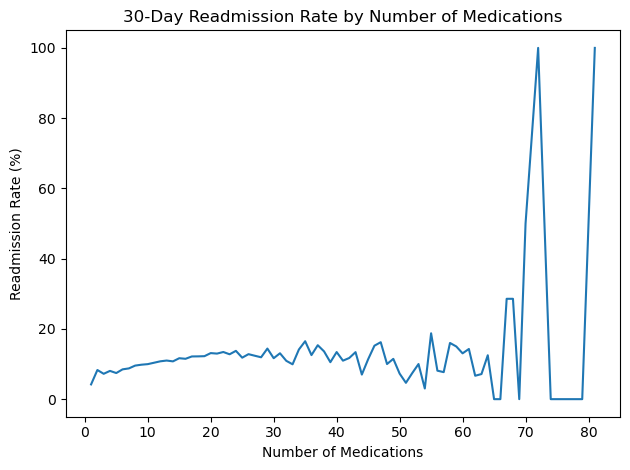

In [17]:
med_readmit_rate = (
    df.groupby('num_medications')['readmitted_30']
      .mean()
      .sort_index() * 100
)

import matplotlib.pyplot as plt

plt.figure()
med_readmit_rate.plot()
plt.title('30-Day Readmission Rate by Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Readmission Rate (%)')
plt.tight_layout()
plt.show()

In [18]:
(df.isin(['?']).mean() * 100).sort_values(ascending=False)

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
admission_type_id            0.000000
discharge_disposition_id     0.000000
patient_nbr                  0.000000
encounter_id                 0.000000
time_in_hospital             0.000000
admission_source_id          0.000000
num_procedures               0.000000
num_lab_procedures           0.000000
num_medications              0.000000
number_outpatient            0.000000
age                          0.000000
gender                       0.000000
number_inpatient             0.000000
number_emergency             0.000000
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [19]:
cols_to_drop = ['weight', 'medical_specialty', 'payer_code']

df = df.drop(columns=cols_to_drop)

In [20]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_30'],
      dtype='object')

In [21]:
df.isnull().mean().sort_values(ascending=False)

max_glu_serum               0.947468
A1Cresult                   0.832773
encounter_id                0.000000
patient_nbr                 0.000000
age                         0.000000
admission_type_id           0.000000
race                        0.000000
gender                      0.000000
time_in_hospital            0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
diag_1                      0.000000
number_inpatient            0.000000
diag_3                      0.000000
diag_2                      0.000000
number_diagnoses            0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
g

In [22]:
df.isnull().mean().sort_values(ascending=False)

max_glu_serum               0.947468
A1Cresult                   0.832773
encounter_id                0.000000
patient_nbr                 0.000000
age                         0.000000
admission_type_id           0.000000
race                        0.000000
gender                      0.000000
time_in_hospital            0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
diag_1                      0.000000
number_inpatient            0.000000
diag_3                      0.000000
diag_2                      0.000000
number_diagnoses            0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
g

In [23]:
cols_to_drop = ['max_glu_serum', 'A1Cresult']
df = df.drop(columns=cols_to_drop)

In [24]:
df.isnull().sum().sum()

np.int64(0)

In [25]:
#NaN represents missing or unrecorded values. I analyze missingness before modeling to avoid bias and invalid imputations, especially in clinical datasets.

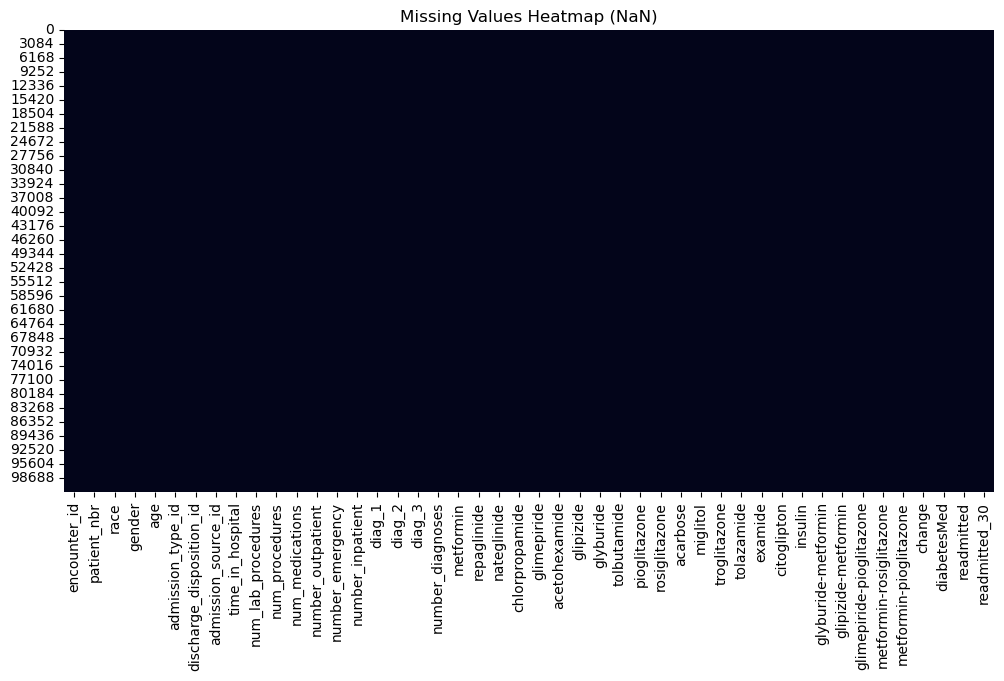

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap (NaN)")
plt.show()

In [28]:
X = df.drop(columns=['readmitted', 'readmitted_30'])
y = df['readmitted_30']

In [30]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

print("Categoric Columns:", len(cat_cols))
print("Numeric Columns:", len(num_cols))

Categoric Columns: 31
Numeric Columns: 13


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [33]:
# “Built a preprocessing pipeline using ColumnTransformer and OneHotEncoder to handle mixed clinical data types.”

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [36]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [37]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbos...
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [38]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

In [39]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

In [40]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.888     1.000     0.941     18083
           1      0.000     0.000     0.000      2271

    accuracy                          0.888     20354
   macro avg      0.444     0.500     0.470     20354
weighted avg      0.789     0.888     0.836     20354



c:\Users\Ilan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ilan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ilan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


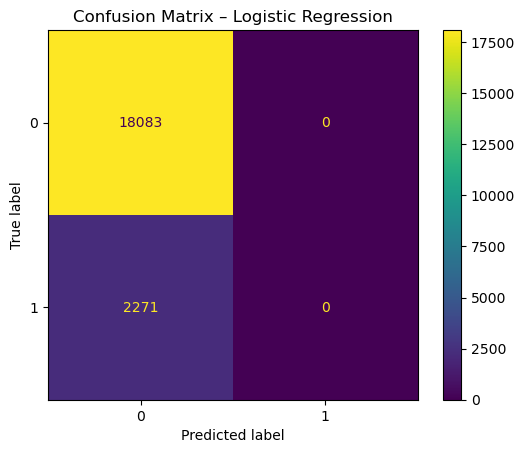

In [41]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

ROC-AUC: 0.4932


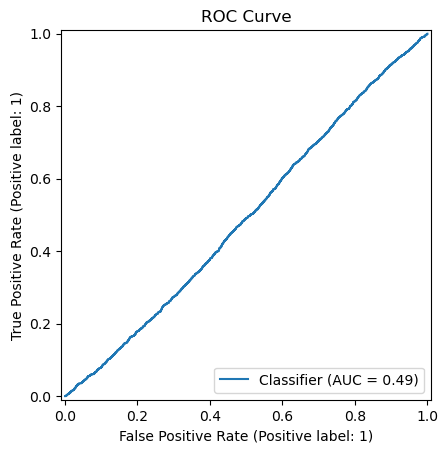

In [42]:
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", round(auc, 4))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()

In [43]:
# “A baseline Logistic Regression with default settings did not show discriminative power (ROC-AUC ≈ 0.49), indicating that additional modeling strategies are required.”

In [44]:
y.value_counts(normalize=True)

readmitted_30
0    0.888401
1    0.111599
Name: proportion, dtype: float64

In [45]:
clf_balanced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

clf_balanced.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbos...
                                                 ('num', 'passthrough',
                                                  Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [46]:
y_pred_bal = clf_balanced.predict(X_test)
y_proba_bal = clf_balanced.predict_proba(X_test)[:, 1]

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_bal, digits=3))

              precision    recall  f1-score   support

           0      0.892     0.604     0.720     18083
           1      0.117     0.417     0.182      2271

    accuracy                          0.583     20354
   macro avg      0.504     0.510     0.451     20354
weighted avg      0.805     0.583     0.660     20354



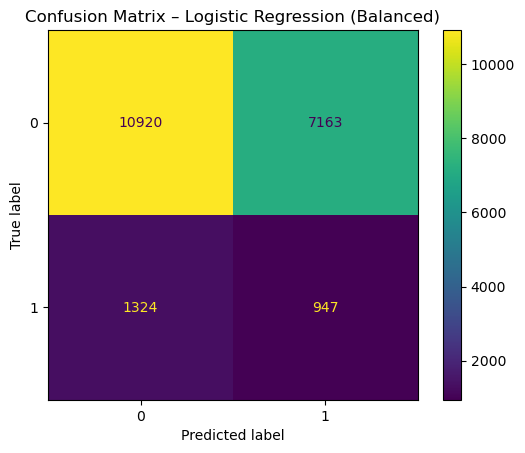

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_bal = confusion_matrix(y_test, y_pred_bal)
ConfusionMatrixDisplay(confusion_matrix=cm_bal).plot()
plt.title("Confusion Matrix – Logistic Regression (Balanced)")
plt.show()

ROC-AUC (balanced): 0.5099


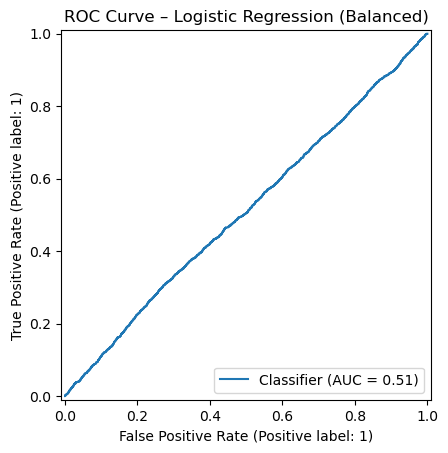

In [49]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

auc_bal = roc_auc_score(y_test, y_proba_bal)
print("ROC-AUC (balanced):", round(auc_bal, 4))

RocCurveDisplay.from_predictions(y_test, y_proba_bal)
plt.title("ROC Curve – Logistic Regression (Balanced)")
plt.show()

In [50]:
# “A balanced Logistic Regression slightly improved discrimination (ROC-AUC ≈ 0.51), suggesting class imbalance played a role, but overall performance indicates that non-linear models are required to capture the underlying patterns.”

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbos...
                                                  Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [52]:
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf, digits=3))

              precision    recall  f1-score   support

           0      0.889     1.000     0.941     18083
           1      0.700     0.006     0.012      2271

    accuracy                          0.889     20354
   macro avg      0.795     0.503     0.477     20354
weighted avg      0.868     0.889     0.837     20354



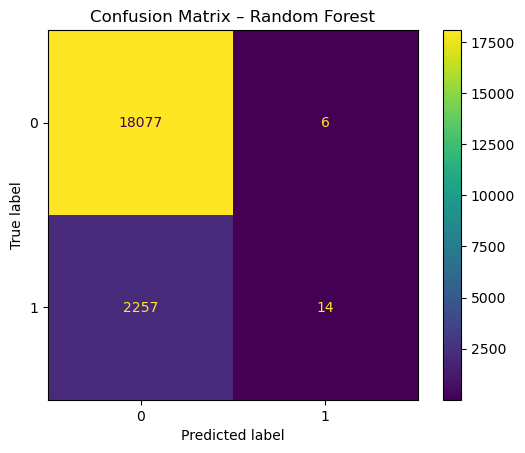

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()
plt.title("Confusion Matrix – Random Forest")
plt.show()

ROC-AUC (Random Forest): 0.664


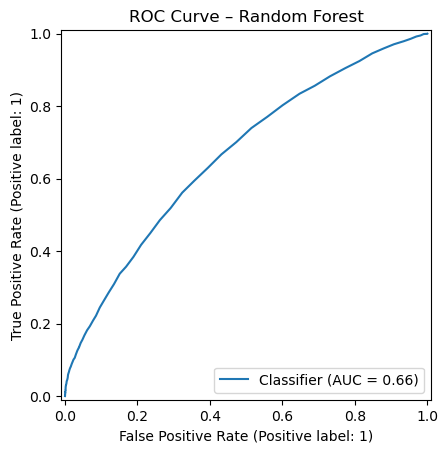

In [55]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC (Random Forest):", round(auc_rf, 4))

RocCurveDisplay.from_predictions(y_test, y_proba_rf)
plt.title("ROC Curve – Random Forest")
plt.show()

In [56]:
# “A Random Forest model significantly improved performance over Logistic Regression, achieving a ROC-AUC of 0.66, indicating meaningful non-linear patterns in hospital readmission risk.”

In [57]:
import pandas as pd

# obtain features names after Onehut
feature_names = (
    rf_clf.named_steps['preprocessor']
    .get_feature_names_out()
)

importances = rf_clf.named_steps['model'].feature_importances_

feat_imp = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    .sort_values(by='importance', ascending=False)
)

feat_imp.head(15)

,feature,importance
2262,num__encounter_id,0.051028
2263,num__patient_nbr,0.050632
2268,num__num_lab_procedures,0.046667
2270,num__num_medications,0.043094
2273,num__number_inpatient,0.037113
2267,num__time_in_hospital,0.034462
2265,num__discharge_disposition_id,0.027923
2274,num__number_diagnoses,0.025047
2269,num__num_procedures,0.024667
2264,num__admission_type_id,0.018737


In [58]:
# “The model identified length of stay, medication burden, and diabetes treatment changes as the strongest predictors of 30-day readmission.”

In [59]:
# “Feature importance revealed that encounter and patient identifiers were driving predictions, so they were removed to prevent data leakage.”

In [60]:
X = X.drop(columns=['encounter_id', 'patient_nbr'])

# Recalculate columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

rf_clf.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [62]:
print('encounter_id' in X.columns)
print('patient_nbr' in X.columns)

False
False


In [63]:
X = X.drop(columns=['encounter_id', 'patient_nbr'], errors='ignore')

In [64]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

print("Categoric Columns:", len(cat_cols))
print("Numeric Columns:", len(num_cols))

Categoric Columns: 31
Numeric Columns: 11


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbos...
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [67]:
from sklearn.metrics import roc_auc_score

y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC (RF sin IDs):", round(auc_rf, 4))

ROC-AUC (RF sin IDs): 0.6539


In [68]:
feat_imp.head(15)

,feature,importance
2262,num__encounter_id,0.051028
2263,num__patient_nbr,0.050632
2268,num__num_lab_procedures,0.046667
2270,num__num_medications,0.043094
2273,num__number_inpatient,0.037113
2267,num__time_in_hospital,0.034462
2265,num__discharge_disposition_id,0.027923
2274,num__number_diagnoses,0.025047
2269,num__num_procedures,0.024667
2264,num__admission_type_id,0.018737


In [70]:
# Conclusion a random Forest model achieved a ROC-AUC of 0.654 after removing patient identifiers to prevent data leakage. Feature importance analysis showed that length of hospital stay, medication burden, and prior inpatient utilization were the strongest predictors of 30-day readmission, suggesting that readmission risk is primarily driven by clinical complexity rather than demographic factors.